___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

font_title = {'family': 'times new roman', 
              'color': 'darkred', 
              'weight': 'bold', 
              'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

#### Load Dataset

In [215]:
df = pd.read_csv("Mall_Customers.csv")
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


#### Explore Data

You can rename columns to more usable, if you need.

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [217]:
df.duplicated().sum()

0

In [218]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [219]:
for col in df.columns:
    print("Column", col, "has", df[col].nunique(), "unique values")

Column CustomerID has 200 unique values
Column Gender has 2 unique values
Column Age has 51 unique values
Column Annual Income (k$) has 64 unique values
Column Spending Score (1-100) has 84 unique values


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [220]:
# There is no missing value

df.isnull().sum().any()

False

In [221]:
# replacing values
#df['Gender'].replace(['Female', 'Male'],
                  #      [0, 1], inplace=True)
#df['Gender'].unique

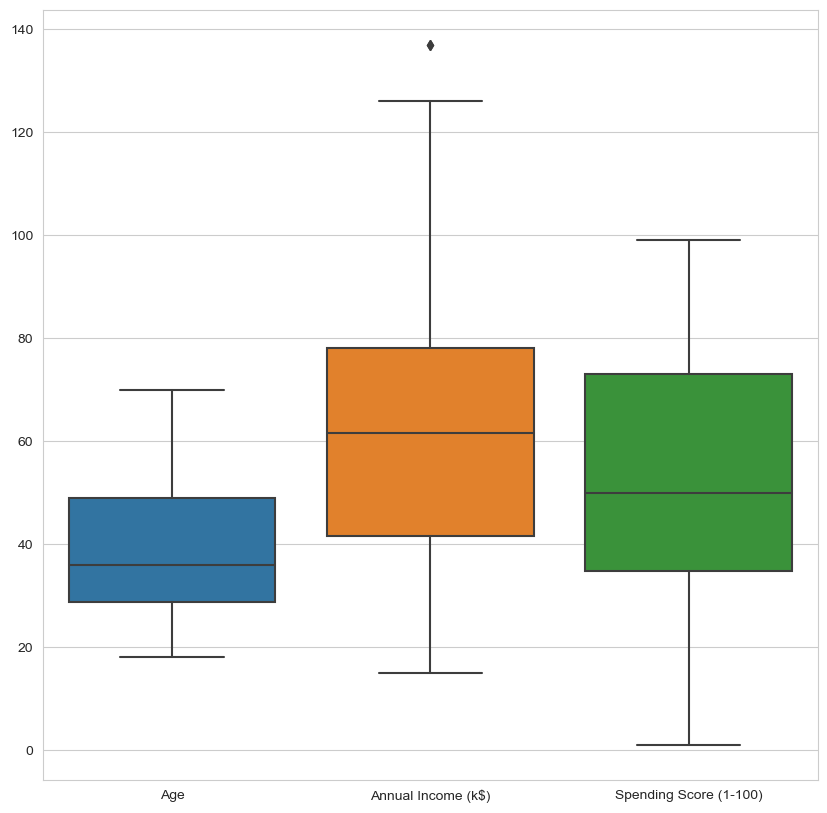

In [222]:
plt.figure(figsize=(10, 10))

sns.boxplot(data=df.drop("CustomerID", axis=1));

In [223]:
df1=df.drop("CustomerID", axis = 1)

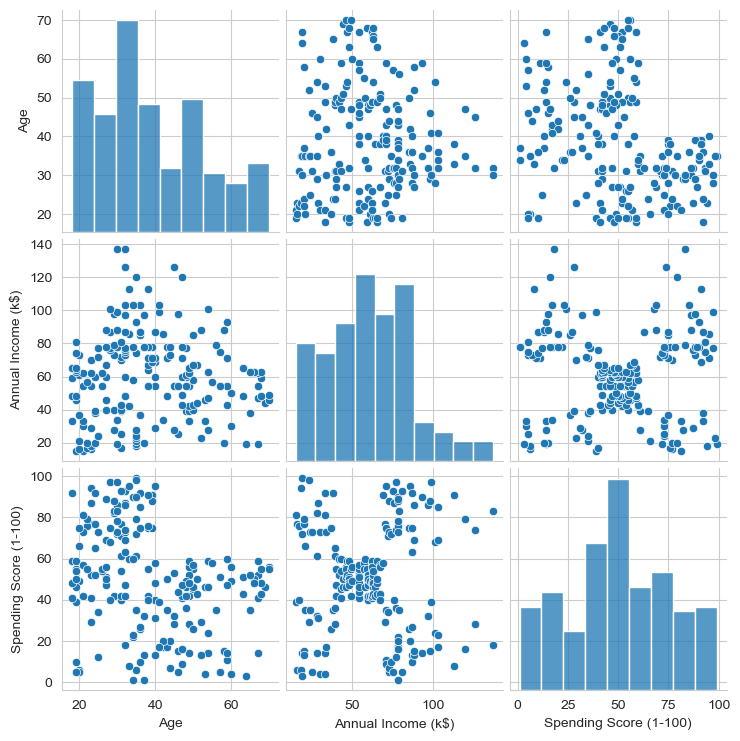

In [224]:
sns.pairplot(df1)
plt.show()

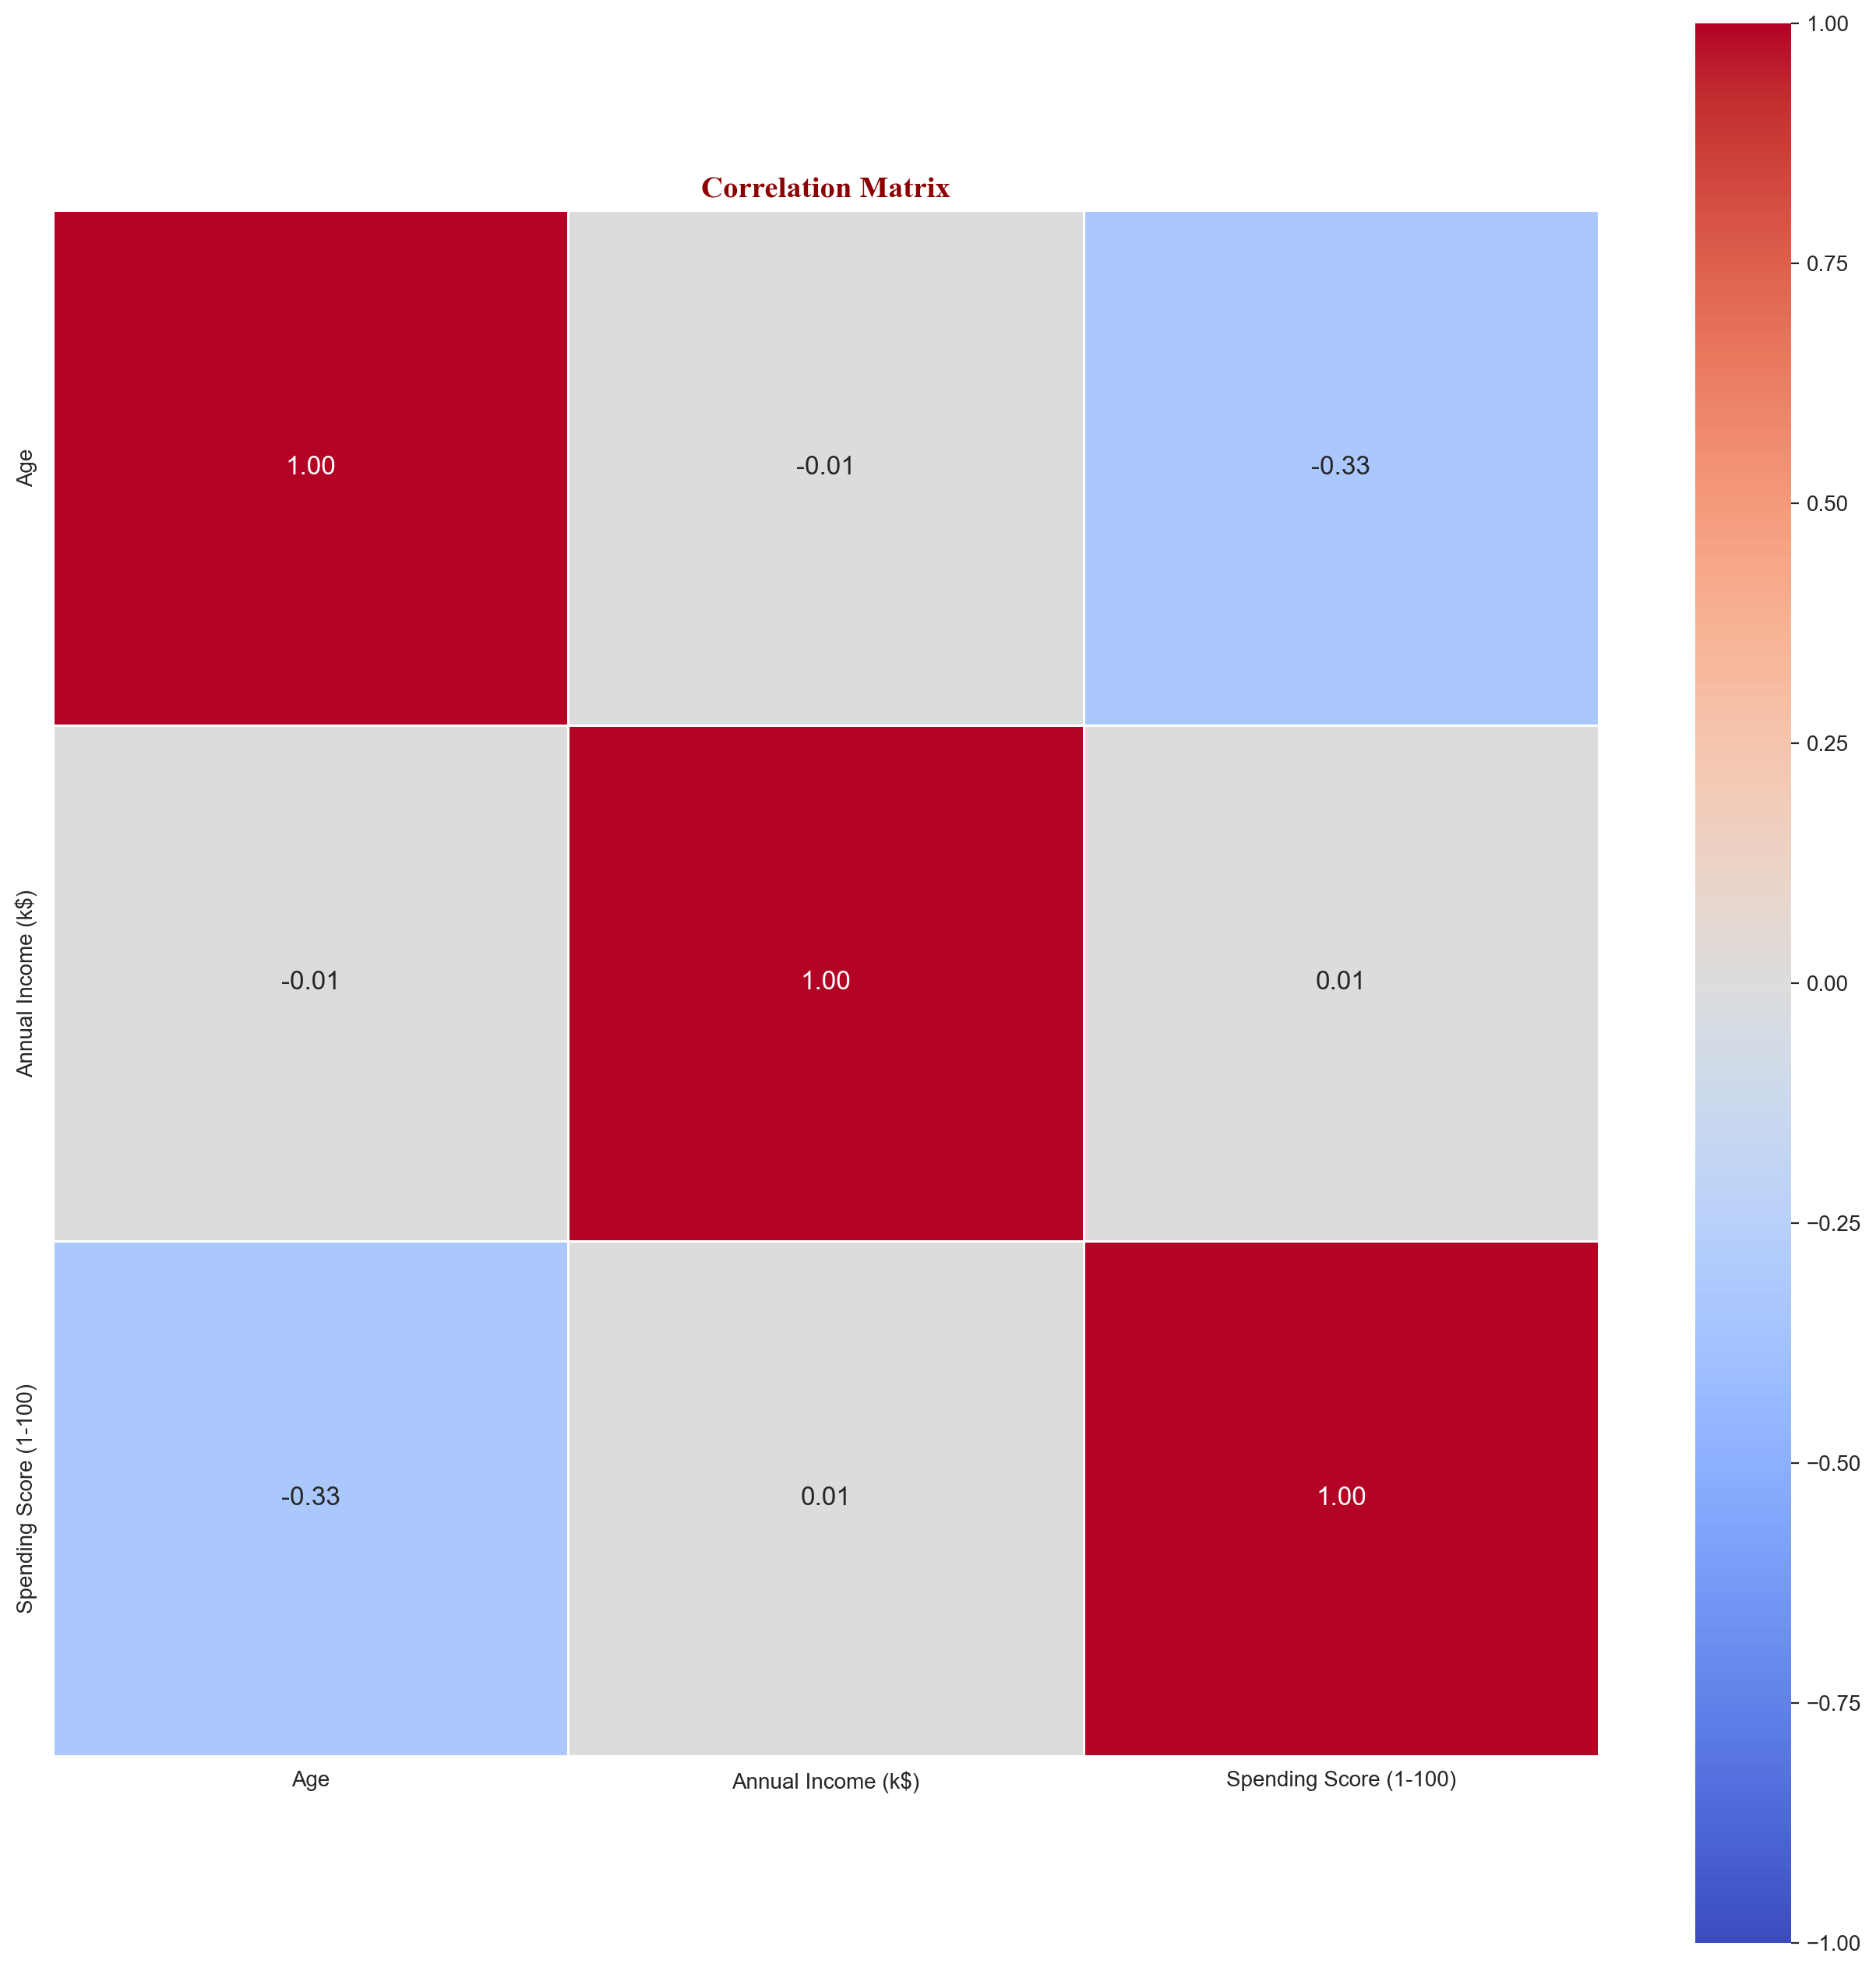

In [225]:
corr_matrix = df1.corr()

plt.figure(figsize=(16, 16), dpi=200)

sns.heatmap(corr_matrix, 
            square=True, 
            annot=True, 
            fmt=".2f", 
            annot_kws={"size": 12}, 
            linewidths=.5, 
            vmin=-1, 
            vmax=1, 
            cmap='coolwarm')

plt.title("Correlation Matrix", fontdict=font_title)

plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [226]:
#
X = df1.drop(['Gender','Annual Income (k$)'], axis = 1)
# There is no train-test split because it is unsupervised learning!
X.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [227]:
X.shape

(200, 2)

#### *ii. Determine optimal number of clusters*

## Elbow metod

In [228]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans



In [229]:
ssd = []

K = range(2,10)

for k in K:
    model3 = KMeans(n_clusters =k)
    model3.fit(X)
    ssd.append(model3.inertia_)

Text(0.5, 1.0, 'elbow method')

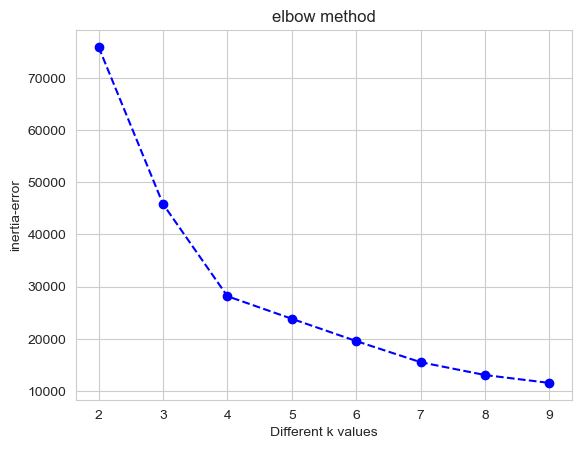

In [230]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

#### *iii. Apply K Means*

In [231]:

K_means_model = KMeans(n_clusters=4,
                       random_state=42)

In [232]:
K_means_model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [233]:
K_means_model.predict(X)

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [234]:
y_km = K_means_model.fit_predict(X)
y_km

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [235]:
clusters = K_means_model.labels_
clusters

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [236]:
X["predicted_clusters"] = clusters

In [237]:
X.head(50)

,Age,Spending Score (1-100),predicted_clusters
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
5,22,76,1
6,35,6,2
7,23,94,1
8,64,3,2
9,30,72,1


#### *iv. Visualizing and Labeling All the Clusters*

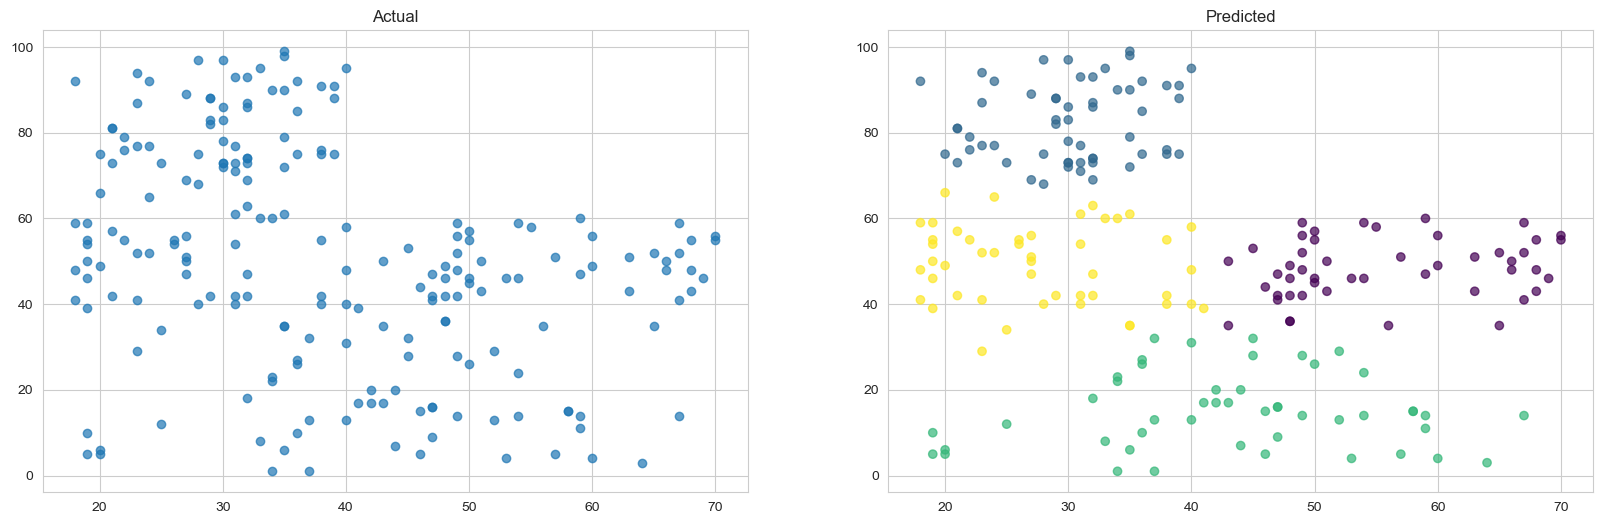

In [238]:
plt.figure(figsize = (20,6))

# we will select 2 features and look at their distribution with each other
plt.subplot(121)
plt.scatter(X["Age"],
            X["Spending Score (1-100)"],
           # c=X,  # c : coloring parameter
            cmap="viridis",
            alpha=0.7)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["Age"],
            X["Spending Score (1-100)"],
            c=X.predicted_clusters,
            cmap="viridis",
            alpha=0.7)
plt.title("Predicted");

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

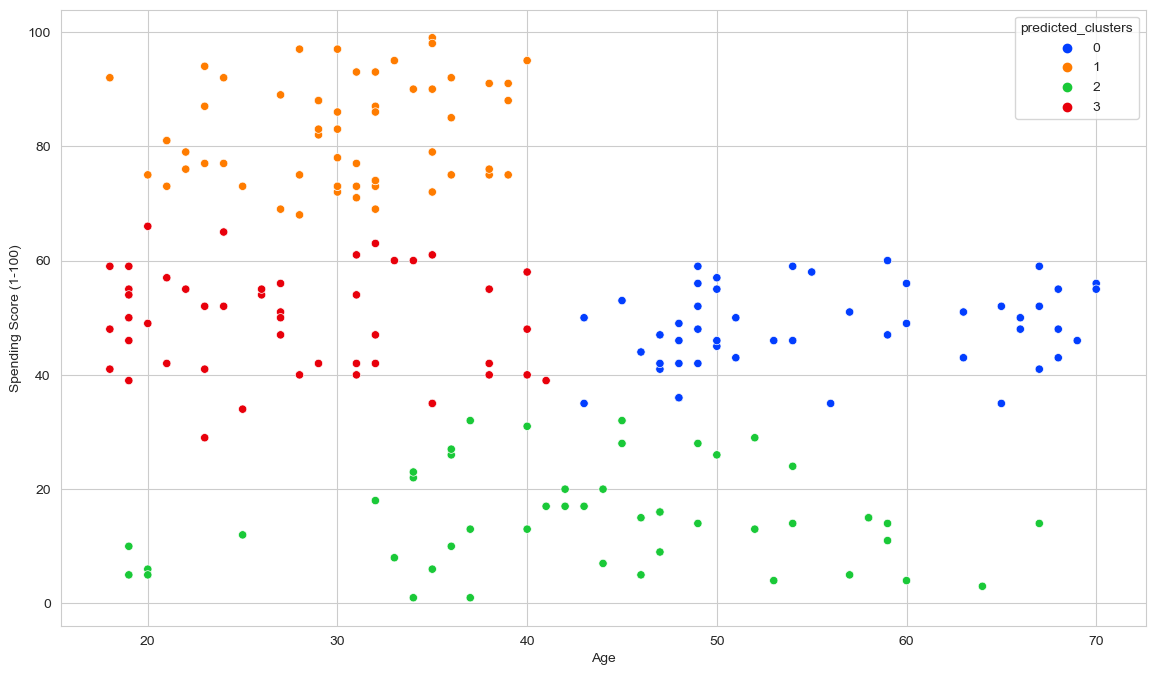

In [239]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='Age',
                y='Spending Score (1-100)',
                hue=X.predicted_clusters,
                data=X,
                palette="bright")


In [240]:
X_labels = X.predicted_clusters.map({0:"MedSpending-Older ", 1:"HighSpending-Young", 2:"LowSpending", 3:"MedSpending-Young"})
X_labels 

0       MedSpending-Young
1      HighSpending-Young
2             LowSpending
3      HighSpending-Young
4       MedSpending-Young
              ...        
195    HighSpending-Young
196           LowSpending
197    HighSpending-Young
198           LowSpending
199    HighSpending-Young
Name: predicted_clusters, Length: 200, dtype: object

In [241]:
X["predicted_clusters_Lables"] = X_labels 
X.head(50)

,Age,Spending Score (1-100),predicted_clusters,predicted_clusters_Lables
0,19,39,3,MedSpending-Young
1,21,81,1,HighSpending-Young
2,20,6,2,LowSpending
3,23,77,1,HighSpending-Young
4,31,40,3,MedSpending-Young
5,22,76,1,HighSpending-Young
6,35,6,2,LowSpending
7,23,94,1,HighSpending-Young
8,64,3,2,LowSpending
9,30,72,1,HighSpending-Young


### Why silhouette_score is negative?

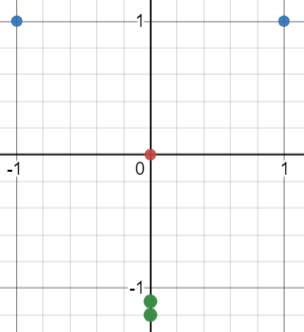

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [242]:
X2 = df1.drop(['Gender','Age'], axis = 1)
# There is no train-test split because it is unsupervised learning!
X2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### *ii. Determine optimal number of clusters*

In [243]:
ssd = []

K = range(2,10)

for k in K:
    model3 = KMeans(n_clusters =k)
    model3.fit(X2)
    ssd.append(model3.inertia_)

Text(0.5, 1.0, 'elbow method')

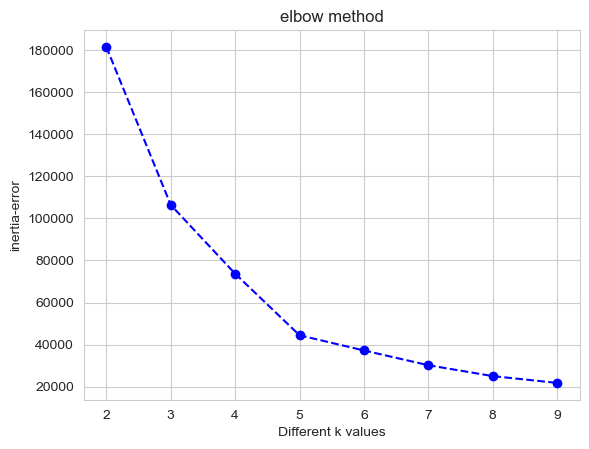

In [244]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

#### *iii. Apply K Means*

In [245]:

K_means_model2 = KMeans(n_clusters=5,
                       random_state=42)

#### *iv. Visualizing and Labeling All the Clusters*

In [246]:
K_means_model2.fit(X2)

KMeans(n_clusters=5, random_state=42)

In [247]:
K_means_model2.predict(X2)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [248]:
y_km2 = K_means_model2.fit_predict(X2)
y_km2

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [249]:
clusters2 = K_means_model2.labels_
clusters2

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [250]:
X2["predicted_clusters"] = clusters2
X2.head(50)

,Annual Income (k$),Spending Score (1-100),predicted_clusters
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
5,17,76,2
6,18,6,4
7,18,94,2
8,19,3,4
9,19,72,2


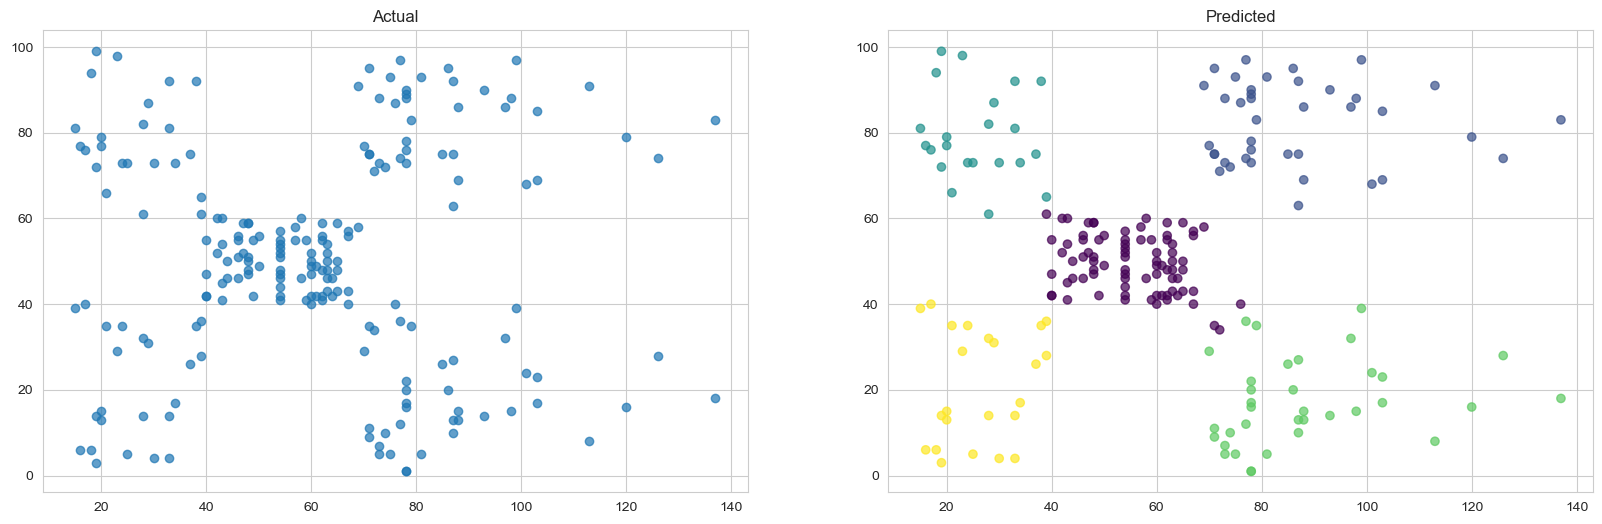

In [251]:
plt.figure(figsize = (20,6))

# we will randomly select 2 features and look at their distribution with each other
plt.subplot(121)
plt.scatter(X2["Annual Income (k$)"],
            X2["Spending Score (1-100)"],
           # c=X,  # c : coloring parameter
            cmap="viridis",
            alpha=0.7)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X2["Annual Income (k$)"],
            X2["Spending Score (1-100)"],
            c=X2.predicted_clusters,
            cmap="viridis",
            alpha=0.7)
plt.title("Predicted");

In [252]:
X2["predicted_clusters"] = clusters2
X2.head(25)

,Annual Income (k$),Spending Score (1-100),predicted_clusters
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
5,17,76,2
6,18,6,4
7,18,94,2
8,19,3,4
9,19,72,2


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

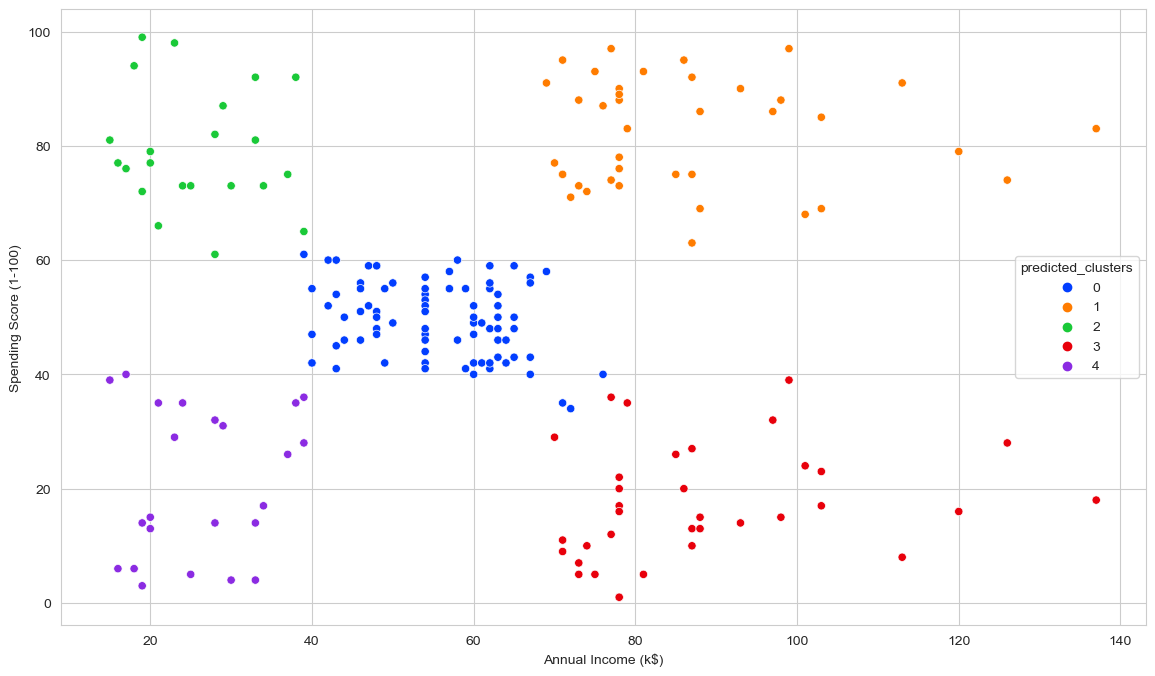

In [253]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue=X2.predicted_clusters,
                data=X2,
                palette="bright")

In [254]:
X2_labels = X2.predicted_clusters.map({0:"MedIncom-MedSpend ", 1:"HighIncom-HighSpend", 2:"LowIncom-HighSpend", 3:"HighIncome-LowSpend", 4:"LowIncome-LowSpend"})
X2_labels 

0       LowIncome-LowSpend
1       LowIncom-HighSpend
2       LowIncome-LowSpend
3       LowIncom-HighSpend
4       LowIncome-LowSpend
              ...         
195    HighIncom-HighSpend
196    HighIncome-LowSpend
197    HighIncom-HighSpend
198    HighIncome-LowSpend
199    HighIncom-HighSpend
Name: predicted_clusters, Length: 200, dtype: object

In [255]:
X2["predicted_clusters_Lables"] = X2_labels 
X2.head(50)

,Annual Income (k$),Spending Score (1-100),predicted_clusters,predicted_clusters_Lables
0,15,39,4,LowIncome-LowSpend
1,15,81,2,LowIncom-HighSpend
2,16,6,4,LowIncome-LowSpend
3,16,77,2,LowIncom-HighSpend
4,17,40,4,LowIncome-LowSpend
5,17,76,2,LowIncom-HighSpend
6,18,6,4,LowIncome-LowSpend
7,18,94,2,LowIncom-HighSpend
8,19,3,4,LowIncome-LowSpend
9,19,72,2,LowIncom-HighSpend


### Hierarchical Clustering

In [256]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [257]:
HX = df1.drop(['Gender','Annual Income (k$)'], axis = 1)
# There is no train-test split because it is unsupervised learning!
HX.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [258]:
import plotly.figure_factory as ff
np.random.seed(1)

fig = ff.create_dendrogram(HX)
fig.update_layout(width=2500, height=700)
fig.show()

In [259]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(HX)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(HX, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091
For n_clusters=10, the silhouette score is 0.3876666104778445


## Clustering based on Annual Income and Spending Score- x2

In [260]:
HX2 = df1.drop(['Gender','Age'], axis = 1)
# There is no train-test split because it is unsupervised learning!
HX2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [261]:
import plotly.figure_factory as ff
np.random.seed(1)

fig = ff.create_dendrogram(HX2)
fig.update_layout(width=2500, height=700)
fig.show()

In [262]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(HX2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(HX2, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.36706444723912895
For n_clusters=3, the silhouette score is 0.4618340266628975
For n_clusters=4, the silhouette score is 0.4916598193892782
For n_clusters=5, the silhouette score is 0.5529945955148897
For n_clusters=6, the silhouette score is 0.5380208285578872
For n_clusters=7, the silhouette score is 0.519904611908887
For n_clusters=8, the silhouette score is 0.4326286245782246
For n_clusters=9, the silhouette score is 0.43892545672004507
For n_clusters=10, the silhouette score is 0.4342656377895271


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [263]:
Agg1 = AgglomerativeClustering(
    n_clusters=4,
    metric=
    'euclidean',  # If linkage = "ward" then metric='euclidean' is required.
    linkage='ward')  # originating from the formulation of variance...
HY = Agg1.fit_predict(HX)

In [264]:
HX['cluster_Agg'] = HY
HX.head()

,Age,Spending Score (1-100),cluster_Agg
0,19,39,0
1,21,81,3
2,20,6,2
3,23,77,3
4,31,40,0


#### Annual Income and Spending Score- x2

In [265]:
Agg1 = AgglomerativeClustering(
    n_clusters=5,
    metric=
    'euclidean',  # If linkage = "ward" then metric='euclidean' is required.
    linkage='ward')  # originating from the formulation of variance...
HY2 = Agg1.fit_predict(HX2)

In [266]:
HX2['cluster_Agg'] = HY2
HX2.head()

,Annual Income (k$),Spending Score (1-100),cluster_Agg
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

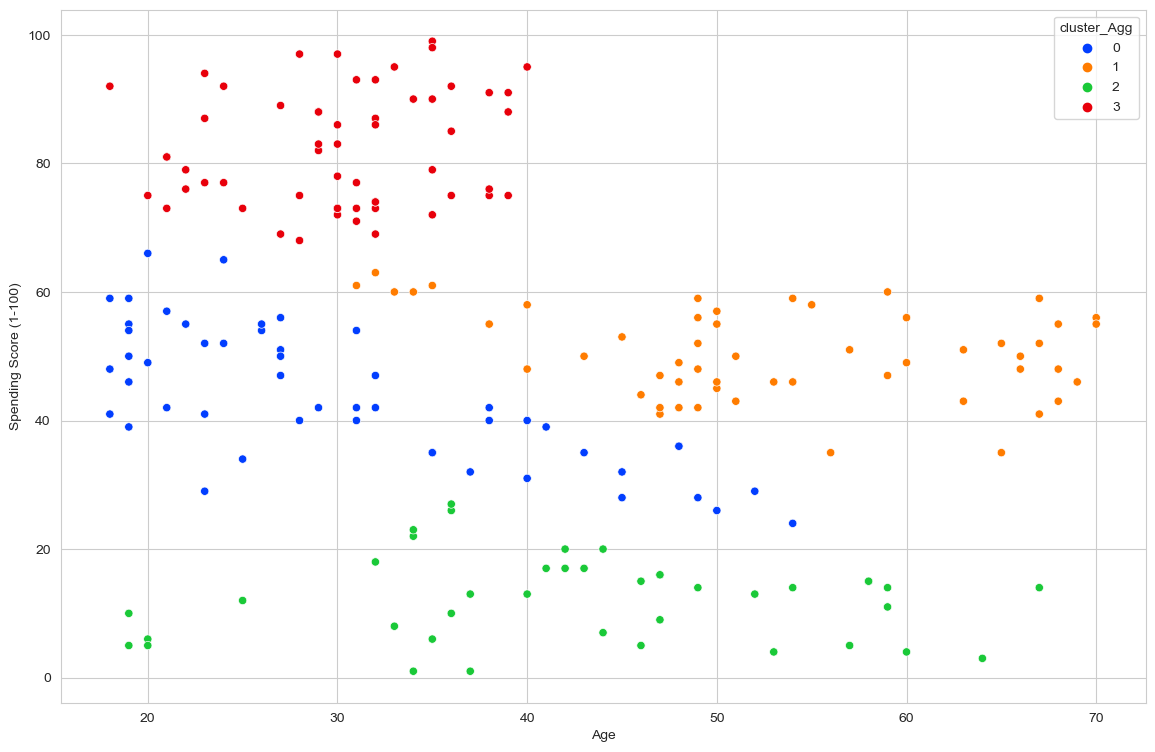

In [267]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Age',
                y='Spending Score (1-100)',
                hue='cluster_Agg',
                data=HX,
                palette="bright")

#### Annual Income and Spending Score- x2

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

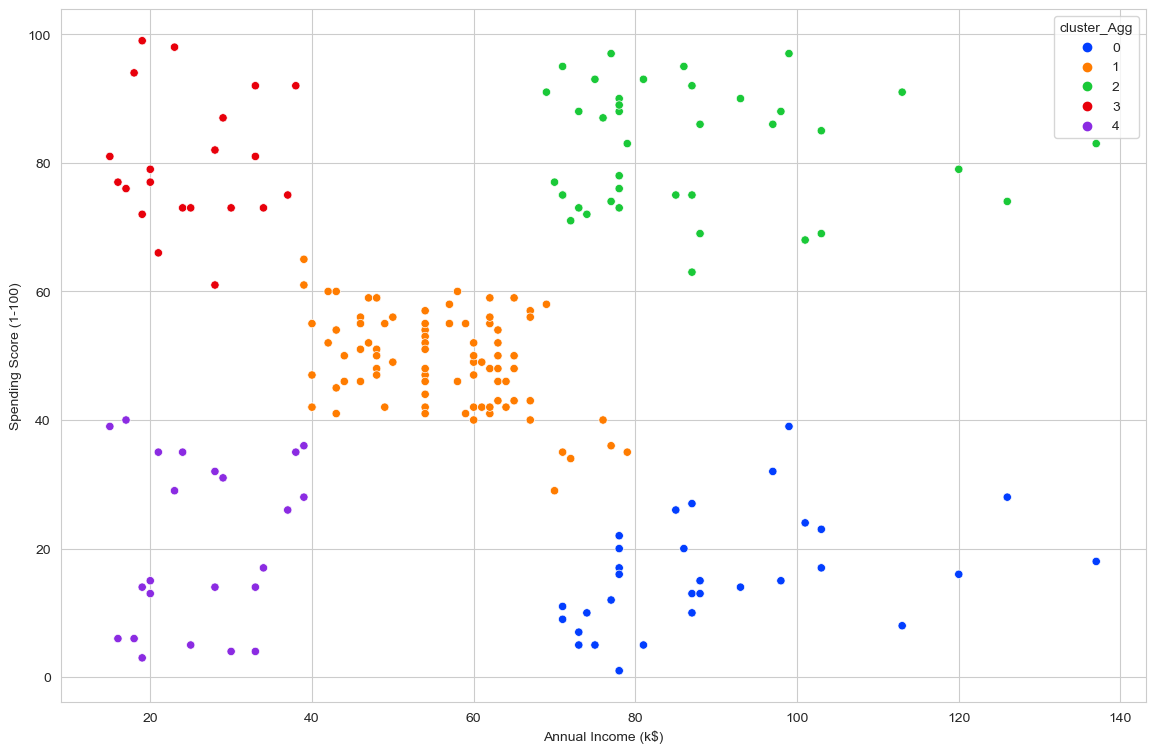

In [268]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='cluster_Agg',
                data=HX2 ,
                palette="bright")

#### Interpretation based on Age and Spending Score- x1

In [269]:
X

,Age,Spending Score (1-100),predicted_clusters,predicted_clusters_Lables
0,19,39,3,MedSpending-Young
1,21,81,1,HighSpending-Young
2,20,6,2,LowSpending
3,23,77,1,HighSpending-Young
4,31,40,3,MedSpending-Young
...,...,...,...,...
195,35,79,1,HighSpending-Young
196,45,28,2,LowSpending
197,32,74,1,HighSpending-Young
198,32,18,2,LowSpending


[Text(0, 0, '57'), Text(0, 0, '48'), Text(0, 0, '48'), Text(0, 0, '47')]

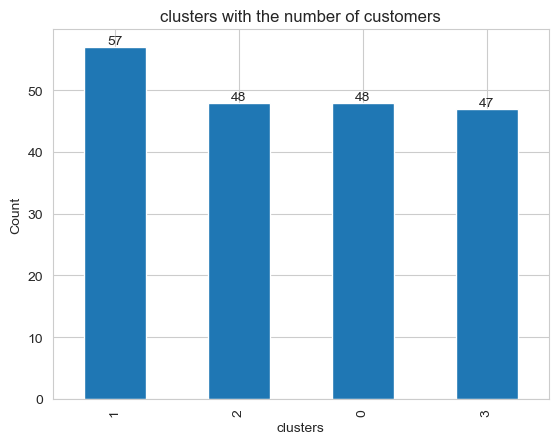

In [270]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X.predicted_clusters.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

In [271]:
df1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [272]:
df["cluster_Age_Spending_Score"] = X.predicted_clusters
df.head()

# We add clusters resulting from Kmeans to our df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_Age_Spending_Score
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


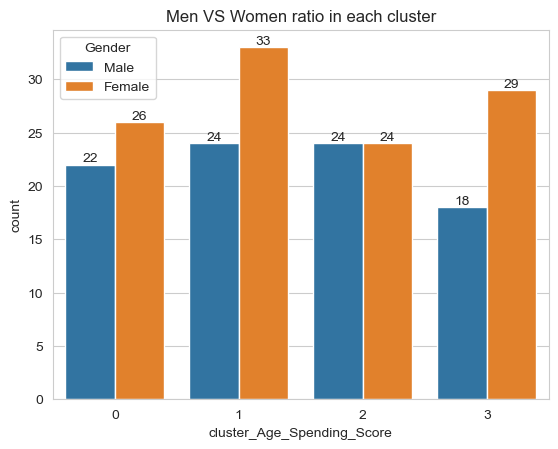

In [273]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)
# We count clusters according to gender.

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [274]:
X2

,Annual Income (k$),Spending Score (1-100),predicted_clusters,predicted_clusters_Lables
0,15,39,4,LowIncome-LowSpend
1,15,81,2,LowIncom-HighSpend
2,16,6,4,LowIncome-LowSpend
3,16,77,2,LowIncom-HighSpend
4,17,40,4,LowIncome-LowSpend
...,...,...,...,...
195,120,79,1,HighIncom-HighSpend
196,126,28,3,HighIncome-LowSpend
197,126,74,1,HighIncom-HighSpend
198,137,18,3,HighIncome-LowSpend


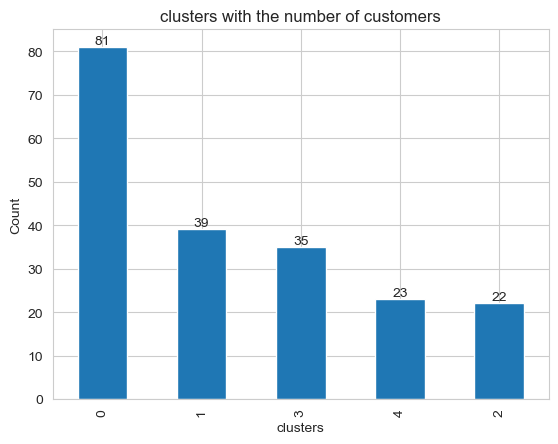

In [275]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X2.predicted_clusters.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [276]:
df1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [280]:
df1["cluster_Annual_Income_Spending_Score"] = X2.predicted_clusters
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_Annual_Income_Spending_Score
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


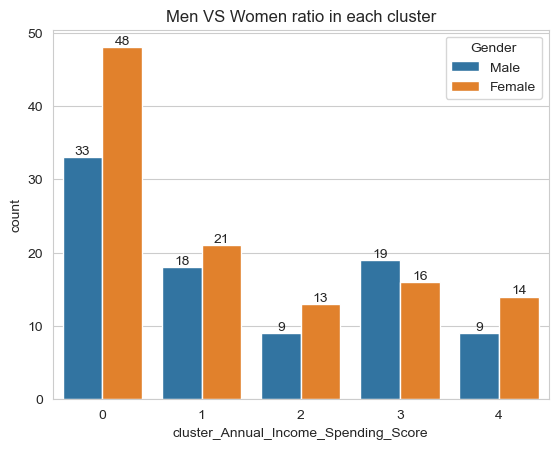

In [282]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df1.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

In [303]:
df

,Age,Annual Income (k$),Spending Score (1-100),cluster_Age_Spending_Score,cluster_Annual_Income_Spending_Score
0,19,15,39,3,4
1,21,15,81,1,2
2,20,16,6,2,4
3,23,16,77,1,2
4,31,17,40,3,4
...,...,...,...,...,...
195,35,120,79,1,1
196,45,126,28,2,3
197,32,126,74,1,1
198,32,137,18,2,3


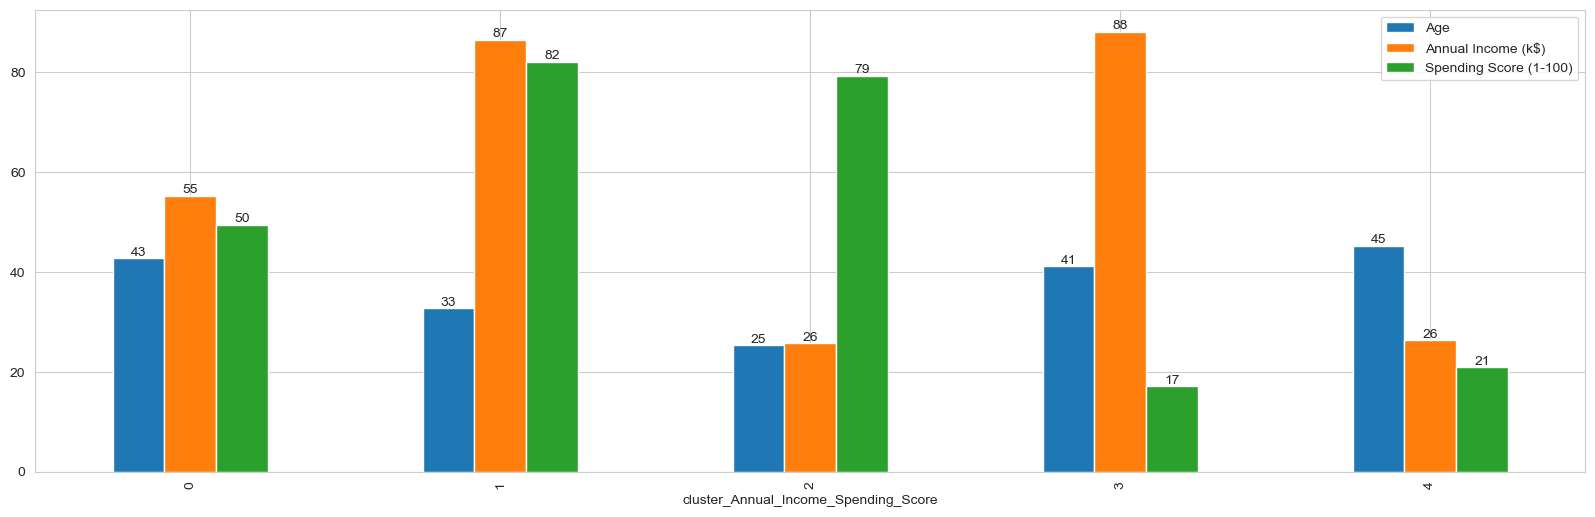

In [305]:
df_test = df
ax = df_test.drop(columns = 'cluster_Age_Spending_Score').groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

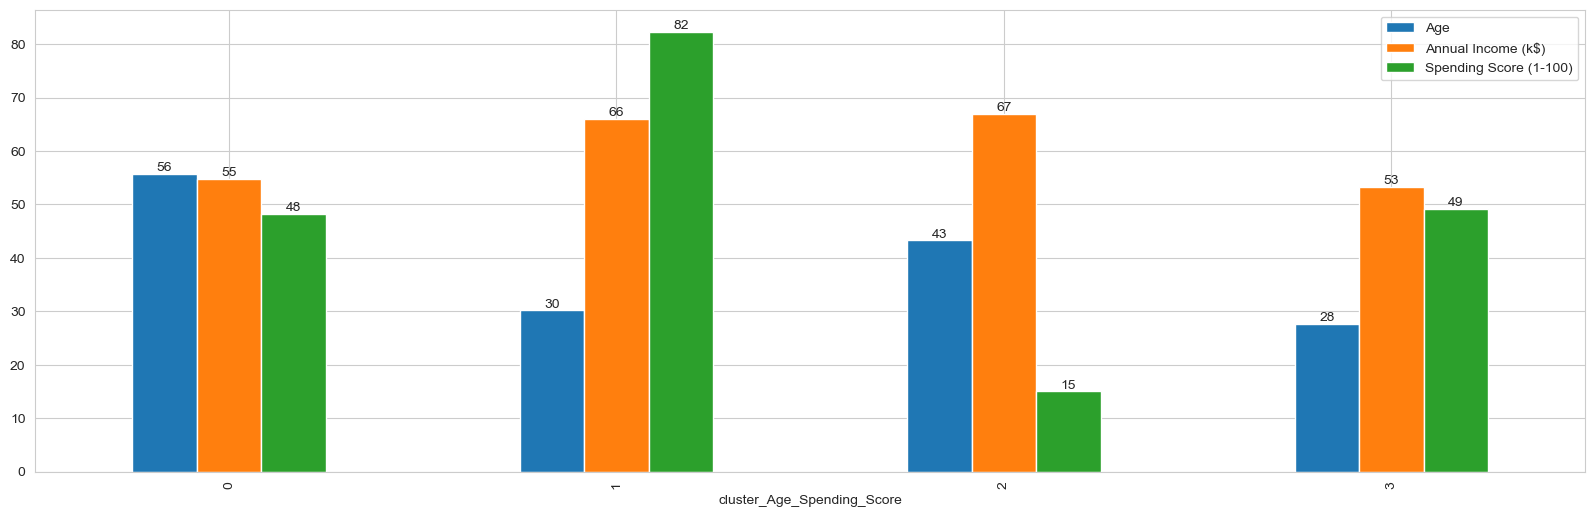

In [307]:
df_test2 = df
ax = df_test2.drop(columns = 'cluster_Annual_Income_Spending_Score').groupby("cluster_Age_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___